In [2]:
import numpy as np
import random
import datetime
import h5py
import os
import merg_rates

import matplotlib as mpl 
mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams

from progressbar import ProgressBar

%matplotlib inline

In [3]:
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
#rcParams['xtick.major.size'] = 5 
#rcParams['xtick.major.width'] = 1.5 
rcParams['ytick.labelsize'] = 16
#rcParams['ytick.major.size'] = 5 
#rcParams['ytick.major.width'] = 1.5 
rcParams['legend.frameon'] = True
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [4]:
tpm=merg_rates.shamedTreepmClass(0.2,seed=1)
def mrz():
    pass
mrz=tpm.merg_rates_z
from merg_rates import dndz

# in merg_rates.shamedTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_

In [193]:
tpm.subcat[0].snap['z']

0.0

In [3]:
anguloms,anguloN=np.loadtxt('dat/true_angulo.csv',delimiter=',',
                            unpack=True)
wetzelloms,wetzelloN=np.loadtxt('dat/true_wetzello.csv',delimiter=',',
                                unpack=True)
wetzelhims,wetzelhiN=np.loadtxt('dat/true_wetzelhi.csv',delimiter=',',
                                unpack=True)

In [12]:
zibeg=0
ziend=1

In [13]:
mMs11,Nhost11,zbeg,zend=mrz(11,zibeg,ziend,N=10000)
dz=zend-zbeg
ns11,mM_midbins_11=dndz(mMs11,Nhost11,dz)

  read /data1/arwetzel/lcdm250/snapshot.txt
  read  3914367 halo from halo_tree_00.dat
  read  3939586 halo from halo_tree_01.dat
  read  3964156 halo from halo_tree_02.dat
  read  3991148 halo from halo_tree_03.dat
  read  4017802 halo from halo_tree_04.dat
  read  4043082 halo from halo_tree_05.dat
  read  4068695 halo from halo_tree_06.dat
  read  4091273 halo from halo_tree_07.dat
  read  4114245 halo from halo_tree_08.dat
  read  4134906 halo from halo_tree_09.dat
  read  4156401 halo from halo_tree_10.dat
  read  4175240 halo from halo_tree_11.dat
  read  4191460 halo from halo_tree_12.dat
  read  4201253 halo from halo_tree_13.dat
  read  4207986 halo from halo_tree_14.dat
  read  4208029 halo from halo_tree_15.dat
  read  4202839 halo from halo_tree_16.dat
  read  4189843 halo from halo_tree_17.dat
  read  4168435 halo from halo_tree_18.dat
  read  4135114 halo from halo_tree_19.dat
  read  4092177 halo from halo_tree_20.dat
  read  4036281 halo from halo_tree_21.dat
  read  39

100% |########################################################################|


<Figure size 864x720 with 0 Axes>

In [14]:
mMs12,Nhost12,zbeg,zend=mrz(12,zibeg,ziend,N=40000)
ns12,mM_midbins_12=dndz(mMs12,Nhost12,dz)


snapshot 0
65868 halos in range.
evaluating 40000


100% |########################################################################|


<Figure size 864x720 with 0 Axes>

In [15]:
mMs13,Nhost13=mrz(13,zibeg,ziend,N=None)[:2]
ns13,mM_midbins_13=dndz(mMs13,Nhost13,dz)


snapshot 0
7804 halos in range.
evaluating 7804


100% |########################################################################|


<Figure size 864x720 with 0 Axes>

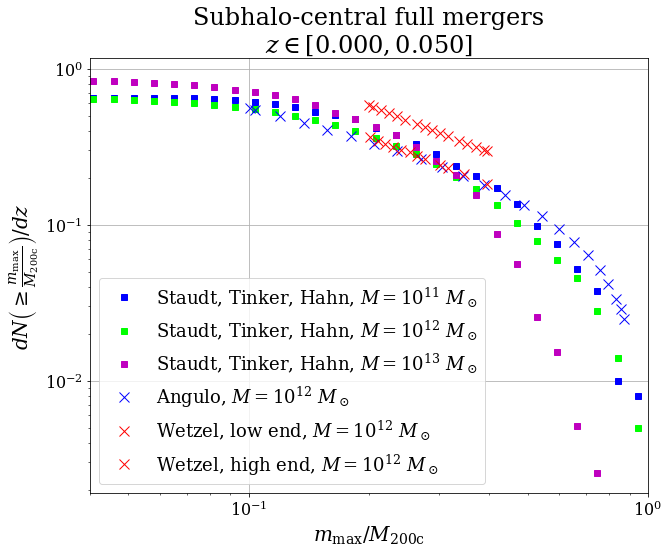

In [36]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)

gcol=(0.,255./255.,0./255.)
ax.loglog(10.**mM_midbins_11,ns11,'s',mec='b',mfc='b',
          label='Staudt, Tinker, Hahn, $M=10^{11}\ M_\odot$')
ax.loglog(10.**mM_midbins_12,ns12,'s',mec=gcol,mfc=gcol,
          label='Staudt, Tinker, Hahn, $M=10^{12}\ M_\odot$')
ax.loglog(10.**mM_midbins_13,ns13,'s',mec='m',mfc='m',
          label='Staudt, Tinker, Hahn, $M=10^{13}\ M_\odot$')

ms=10
ax.loglog(anguloms,anguloN,'x',mec='b',mfc='None',
          label='Angulo, $M=10^{12}\ M_\odot$',ms=ms)
ax.loglog(wetzelloms,wetzelloN,'x',mec='r',mfc='None',
          label='Wetzel, low end, $M=10^{12}\ M_\odot$',ms=ms)
ax.loglog(wetzelhims,wetzelhiN,'x',mec='r',mfc='None',
          label='Wetzel, high end, $M=10^{12}\ M_\odot$',ms=ms)

ax.set_title('Subhalo-central full mergers'
             '\n$z\in[{1:0.3f},{0:0.3f}]$'.
             format(zend,zbeg))
ax.set_xlabel('$m_\mathrm{max}/M_\mathrm{200c}$')
ax.set_ylabel('$dN\left(\geq\\frac{m_\mathrm{max}}{M_\mathrm{200c}}\\right)/dz$')
ax.set_xlim(4e-2,10.**0.)
ax.legend()
plt.show()

## Now testing *galaxy-mass-based* $\frac{dN}{dz}$

In [205]:
#out=merg_rates.read_galmMs(10.5,'cengal','z',0.2,'20190219',1,
#                           '_withz')
out=merg_rates.read_mMs('gal',10.5,'cengal','z',0.2,
                        '20190324',
                        None)
mMs=out[0]
zs=out[8]
Nprim0=out[5]
snap=tpm.subcat.snap

/home/users/staudt/projects/mergers/dat/gal_mMz_Mcengal0_10.50_scat0.20_20190324.h5


In [112]:
zis=range(35)
z_keys=np.array([snap[zi][1] for zi in xrange(35)])

In [7]:
def dNdz_plot(ax,mMs,zs,zmin,zmax,Nprim0):
    #inzrange=(zs<=zmax)&(zs>=zmin)
    inzrange=zs==zmax
    mMs=mMs[inzrange]
    #zs=zs[inzrange]
    dz=zmax-zmin
    dNdzs,mid_mM_bins=merg_rates.dndz(mMs,Nprim0,dz)

    zmid=np.average([zmin,zmax])
    ax.plot(mid_mM_bins,dNdzs,ms=1.3,
            label='z={0:0.2f}'.format(zmid))

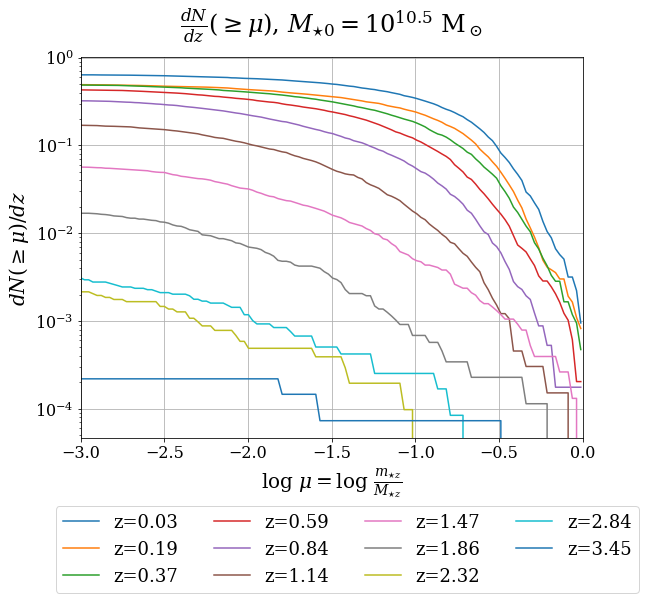

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [190]:
reload(merg_rates)

fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(111)
for zi in np.arange(32)[:34:3]+1:
    dNdz_plot(ax,mMs,zs,z_keys[zi-1],z_keys[zi],Nprim0)
ax.set_yscale('log')
ax.set_xlim(-3,0)
ax.legend(bbox_to_anchor=(1,-.2),
          bbox_transform=fig.transFigure,
          loc="lower right",ncol=4)
#ax.plot(np.repeat(np.log10(1./3.),3),[0.0784,0.047,0.027],'bo',ms=0.8)
#ax.plot(mM_midbins_12,ns12,'s',mec=gcol,mfc=gcol,
#        label='Staudt, Tinker, Hahn, $M=10^{12}\ M_\odot$')
ax.set_title('$\\frac{dN}{dz}(\geq\mu)$, '
             '$M_{\star 0}=10^{10.5}$ M$_\odot$'
             ,y=1.05)
ax.set_ylabel('$dN\left(\geq\mu'
              '\\right)/dz$')
ax.set_xlabel('log $\mu=\log\ \\frac{m_{\star z}}'
              '{M_{\star z}}$')
#ax.text(0.75,0.9,'$M_0=10^{12}$ M$_\odot$',
#        transform=ax.transAxes,
#        fontsize=17)
plt.show()

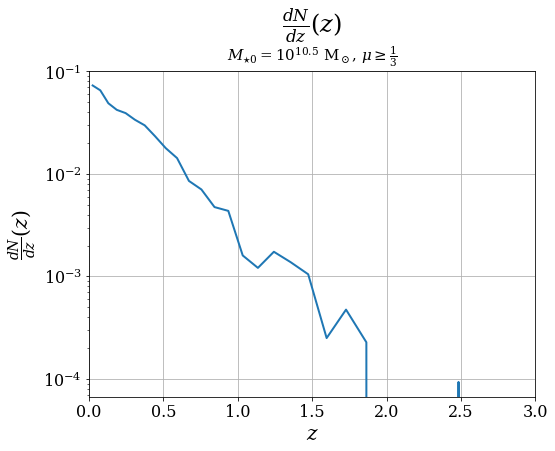

In [206]:
#reload(merg_rates)
mu_den=3.
mu_min=np.log10(1./mu_den)
dNdz_ofzs,zaxis=merg_rates.dndz_ofz(mMs,zs,mu_min,z_keys,
                                    Nprim0,1,34)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(zaxis,dNdz_ofzs,lw=2)
ax.set_yscale('log')
ax.set_title('$\\frac{dN}{dz}(z)$'
             ,y=1.1)
ax.text(0.5,1.03,'$M_{{\star 0}}=10^{{10.5}}$ M$_\odot$, '
        '$\mu\geq\\frac{{1}}{{{0:0.0f}}}$'.format(mu_den),
        transform=ax.transAxes,
        fontsize=15,ha='center')
ax.set_ylabel('$\\frac{dN}{dz}(z)$')
ax.set_xlabel('$z$')
ax.set_xlim(0,3)
plt.show()

In [74]:
print dNdz_ofzs
print zaxis

[0.07847575311348381, 0.0634749389227597, 0.04648178710662104, 0.04760791504159547, 0.04243698497261238, 0.03487001033532445, 0.027192327901835647, 0.024072247409222647, 0.01831175371261027, 0.011820605373760642, 0.010063712269080935, 0.007824387347923253, 0.005717728000808313, 0.003978739928963486, 0.003661438427848967, 0.0023971052948006813, 0.0012746171473769544, 0.00048464146092575645, 0.0005767879106097519, 0.00022034370122933023, 0.00041732053472172154, 0.00030064125028067513, 0.0, 0.0, 0.0, 8.222355849135824e-05, 7.795648684666336e-05, 0.0, 0.0, 6.768307528222924e-05, 6.419947482929643e-05, 0.0, 0.0, 0.0]
[0.0251     0.0765     0.13045    0.18715    0.24665    0.30914998
 0.37484998 0.4439     0.5163     0.5923     0.67225    0.75605
 0.8441     0.9367     1.0337     1.13575    1.243      1.3554499
 1.47365    1.5976     1.72795    1.8646     2.008      2.15895
 2.3176     2.4839501  2.6585002  2.84255    3.03545    3.2371001
 3.4491     3.67245    3.90735    4.15375   ]


# Now running stats for subhalos

In [167]:
reload(merg_rates)

<module 'merg_rates' from 'merg_rates.pyc'>

In [168]:
out_hal=merg_rates.read_mMs('hal',12.,'censubhal','z',None,
                               '20190322',None)
mMs_hal=out_hal[0]
zs_hal=out_hal[8]
Nprim0_hal=out_hal[5]
snap=out_hal[9]

/home/users/staudt/projects/mergers/dat/hal_mMz_Mcensubhal0_12.00_20190322.h5


In [169]:
print mMs_hal[:10]
print mMs[:10]

[ -0.5459528  -11.758371   -11.721194    -1.0181942  -11.58048
  -0.88901997 -11.276281   -11.750058   -11.70508    -11.679997  ]
[-10.498601  -10.190904   -9.938209   -8.95862   -10.439038   -1.030776
 -10.388276  -10.361944   -1.1154823 -10.293483 ]


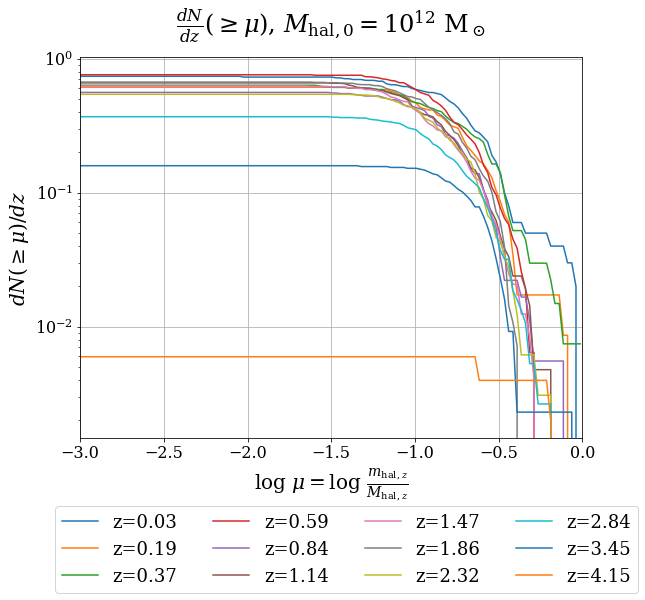

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [170]:
fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(111)
for zi in np.arange(34)[::3]+1:
    dNdz_plot(ax,mMs_hal,zs_hal,z_keys[zi-1],z_keys[zi],
              Nprim0_hal)
ax.set_yscale('log')
ax.set_xlim(-3,0)
ax.legend(bbox_to_anchor=(1,-.2),
          bbox_transform=fig.transFigure,
          loc="lower right",ncol=4)
#ax.plot(np.repeat(np.log10(1./3.),3),[0.0784,0.047,0.027],'bo',ms=0.8)
#ax.plot(mM_midbins_12,ns12,'s',mec=gcol,mfc=gcol,
#        label='Staudt, Tinker, Hahn, $M=10^{12}\ M_\odot$')
ax.set_title('$\\frac{dN}{dz}(\geq\mu)$, '
             '$M_{\mathrm{hal}, 0}=10^{12}$ M$_\odot$'
             ,y=1.05)
ax.set_ylabel('$dN\left(\geq\mu'
              '\\right)/dz$')
ax.set_xlabel('log $\mu=\log\ \\frac{m_{\mathrm{hal}, z}}'
              '{M_{\mathrm{hal}, z}}$')
#ax.text(0.75,0.9,'$M_0=10^{12}$ M$_\odot$',
#        transform=ax.transAxes,
#        fontsize=17)
plt.show()

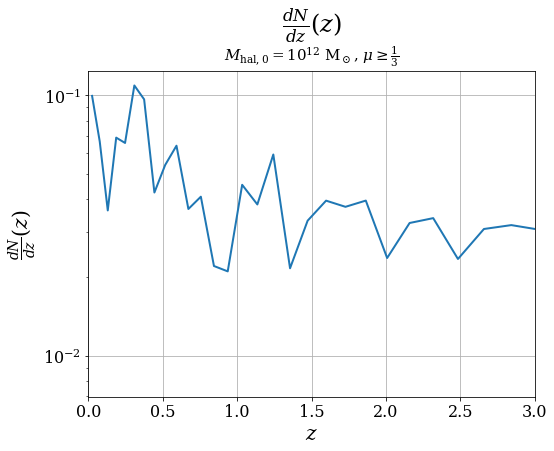

In [175]:
mu_den=3.
mu_min=np.log10(1./mu_den)
dNdz_ofzs,zaxis=merg_rates.dndz_ofz(mMs_hal,zs_hal,mu_min,
                                    z_keys,
                                    Nprim0_hal,1,34)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(zaxis,dNdz_ofzs,lw=2)
ax.set_yscale('log')
ax.set_title('$\\frac{dN}{dz}(z)$'
             ,y=1.1)
ax.text(0.5,1.03,
        '$M_{{\mathrm{{hal}}, 0}}='
        '10^{{12}}$ M$_\odot$,'
        ' $\mu\geq\\frac{{1}}{{{0:0.0f}}}$'.format(mu_den),
        transform=ax.transAxes,
        fontsize=15,ha='center')
ax.set_ylabel('$\\frac{dN}{dz}(z)$')
ax.set_xlabel('$z$')
ax.set_xlim(0,3)
plt.show()